In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
import missingno as msno
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#import dataset
CI_df = pd.read_excel(r"/Users/williambray/Downloads/CI_Registry_Current.xlsx") 
CI_df_final = prepare_dataset(CI_df)

In [47]:
CI_df_final.to_excel('CI_registry_new_review.xlsx', index=True)

In [33]:
##Table of Contents
def prepare_dataset(df):
    
    #df=create_Medicare_candidacy_col(df)
    df=select_cols(df)
    df=col_replace(df)
    df=remove_percent_sign(df)
    df=Fixerrors_CI_Dataset(df)
    df=CI_changes(df)
    df=year_replace(df)
    df=number_cols(df)
    df=year_columns(df)
    df=create_CI_candidate_col(df)
    df=create_CNC_candidacy_col(df)
    #df=impute_length_SPHL(df)
    df=fill_na_prior_surg(df)
    df=exclude_SSD(df)
    df=remove_empty_col(df)
    df=fill_etiology_unknown(df)
    df=drop_miss(df)
    return df

In [28]:
def create_age_col(df):
    df['Age']=df['Date of Birth']
candidacy_cols=[
    'Age at CI Evaluation',
    'export_CI candidacy::L_CNC Score',
    'export_CI candidacy::R_CNC Score',
    'export_CI candidacy::B_AzBio Score',
    'export_CI candidacy::B_AzBio SNR10 Score']
#CI candidate=AZ Bio quiet or +10<60% binaural
def create_CI_candidate_col(df):
    #df['CI candidate']= (df['export_CI candidacy::B_AzBio SNR10 Score']<=60)| (df['export_CI candidacy::B_AzBio Score'] <= 60)
    df.loc[(df['export_CI candidacy::B_AzBio SNR10 Score']<=60)|(df['export_CI candidacy::B_AzBio Score']<= 60),'CI candidate']=1
    df.loc[(df['export_CI candidacy::B_AzBio SNR10 Score']>60)|(df['export_CI candidacy::B_AzBio Score'] > 60),'CI candidate']=0
    return df
def create_CNC_candidacy_col(df):
    #df['CNC candidate']=df['CNC Left']<=40|(df['CNC Right']<=40)
    df.loc[(df['export_CI candidacy::L_CNC Score']<=40)&(df['export_CI candidacy::R_CNC Score']<= 40),'CNC candidate']=1
    df.loc[(df['export_CI candidacy::L_CNC Score']>40)&(df['export_CI candidacy::R_CNC Score']>40),'CNC candidate']=0
    return df
# def create_CNC_candidacy_col(df):
#     df['CNC candidate']=(df['export_CI candidacy::L_CNC Score']<=40)|(df['export_CI candidacy::R_CNC Score']<=40)
#     return df
# medicare candidate= over 65 less than 40% (az quiet or +10) binaural
#########################################################################age= calc from dob and d of CI eval
def create_Medicare_candidacy_col(df):
    df['Medicare candidate'] = (((df['AzBio + 10dB SNR - Binaural'] <= 40) | (df['AzBio Binaural'] <= 40)) & (df['Age at CI Evaluation'] >= 65))
    return df

In [ ]:
def select_cols(df):
    cols=[
    'Date of Birth',
    'export_hearing history::L_Etiology',
    'export_hearing history::L_Age at Onset',
    'export_hearing history::L_Progression Hearing Loss',
    'export_hearing history::L_Age Severe Hearing Loss',
    'export_hearing history::L_Severe Hearing Loss Length',
    'export_hearing history::L_Hearing Aid Use',
    'export_hearing history::L_Hearing Aid Use Time',
    'export_hearing history::L_Years Since No Hearing Aid Use',
    'export_hearing history::L_Tinnitus',
    'export_hearing history::L_Previous Ear Surgery',
    'export_hearing history::L_History Ear Infections',
    'export_hearing history::R_Etiology',
    'export_hearing history::R_Age at Onset',
    'export_hearing history::R_Progression Hearing Loss',
    'export_hearing history::R_Age Severe Hearing Loss',
    'export_hearing history::R_Severe Hearing Loss Length',
    'export_hearing history::R_Hearing Aid Use',
    'export_hearing history::R_Hearing Aid Use Time',
    'export_hearing history::R_Years Since No Hearing Aid Use',
    'export_hearing history::R_Tinnitus',
    'export_hearing history::R_Previous Ear Surgery',
    'export_Preop audiogram::L_Air_125Hz',
    'export_Preop audiogram::L_Air_250Hz',
    'export_Preop audiogram::L_Air_500Hz',
    #'export_Preop audiogram::L_Air_750Hz',
    'export_Preop audiogram::L_Air_1000Hz',
    #'export_Preop audiogram::L_Air_1500Hz',
    'export_Preop audiogram::L_Air_2000Hz',
    'export_Preop audiogram::L_Air_3000Hz',
    'export_Preop audiogram::L_Air_4000Hz',
    #'export_Preop audiogram::L_Air_5000Hz',
    'export_Preop audiogram::L_Air_6000Hz',
    'export_Preop audiogram::L_Air_8000Hz',
    'export_Preop audiogram::L_PTA',
    'export_Preop audiogram::L_PTA4K',
    'export_Preop audiogram::L_PTA Low',
    'export_Preop audiogram::L_PTA Low125',
    'export_Preop audiogram::L_WRS_Percent',
    'export_Preop audiogram::R_Air_125Hz',
    'export_Preop audiogram::R_Air_250Hz',
    'export_Preop audiogram::R_Air_500Hz',
    #'export_Preop audiogram::R_Air_750Hz',
    'export_Preop audiogram::R_Air_1000Hz',
    #'export_Preop audiogram::R_Air_1500Hz',
    'export_Preop audiogram::R_Air_2000Hz',
    'export_Preop audiogram::R_Air_3000Hz',
    'export_Preop audiogram::R_Air_4000Hz',
    #'export_Preop audiogram::R_Air_5000Hz',
    'export_Preop audiogram::R_Air_6000Hz',
    'export_Preop audiogram::R_Air_8000Hz',
    'export_Preop audiogram::R_PTA',
    'export_Preop audiogram::R_PTA4K',
    'export_Preop audiogram::R_PTA Low',
    'export_Preop audiogram::R_PTA Low125',
    'export_Preop audiogram::R_WRS_Percent',
    'export_CI candidacy::L_CNC Score',
    'export_CI candidacy::R_CNC Score',
    'export_CI candidacy::L_AzBio Score',
    'export_CI candidacy::R_AzBio Score',
    'export_CI candidacy::B_AzBio Score',       
    'export_CI candidacy::L_AzBio SNR10 Score',              
    'export_CI candidacy::R_AzBio SNR10 Score',        
    'export_CI candidacy::B_AzBio SNR10 Score',
    'export_CI candidacy::SSD Candidate'
    ]
    df=df[cols]
    return df

In [ ]:
def col_replace(df):
    replace={
    'export_hearing history::L_Age at Onset':{'1980':39},
    'export_hearing history::R_Age at Onset':{'May 2019':59,'1980':39,'2011':51},
    'export_hearing history::L_Hearing Aid Use Time':{'none':0},
    'export_hearing history::R_Hearing Aid Use Time':{'none':0},
    'export_hearing history::L_Years Since No Hearing Aid Use':{'BNA':np.nan,'still':0,'no':0,'No':0},
    'export_hearing history::R_Years Since No Hearing Aid Use':{'BNA':np.nan,'still':0,'no':0,'No':0},
    'export_Preop audiogram::R_Air_125Hz':{'123':120,'124':120},
    'export_Preop audiogram::R_Air_250Hz':{'123':120,'124':120}
    }
    for cols in replace:
        for repl in replace[cols]:
            df.loc[df[cols]==repl, cols] = replace[cols][repl]
    return df

In [ ]:
###general changes
#remove NA values
######ask about 'currently no HA use' value, set to np.nan###
#################################################################PTA values thrown off by 151515 etc. can be fixed##########################

def Fixerrors_CI_Dataset(df):
    nadict = {'see comment':np.nan,'currently no HA use':np.nan,'Currently no  HA use':np.nan,'na':np.nan,'NT':np.nan,'not tested':np.nan,'DNT':np.nan,'NA':np.nan,'dnt':np.nan,' NA':np.nan,'nan':np.nan,'nA':np.nan,'NA ':np.nan,'no info':np.nan, 'NO':'No', 'YES':'Yes','MA':np.nan,'nan':np.nan,'NA\n':np.nan,'N?A':np.nan,'/A':np.nan,'\n':np.nan,' N/A':np.nan,'Unaware of HL in this ear':np.nan,'N/a':np.nan,'\nNA':np.nan}
    df = df.replace(nadict)
    return df

#CI specific changes
def CI_changes(df):
    CI_specific_changes = {'several years':99,'several years - unsure':99,'Unknown':99,'unkown':99,'unsure':99,'Unsure':99,'does not know':99,'unknown-pt unable to report':99,'unkown-pt unable to report':99,'unknown, see TELEPHONE use note':99,'unknown; at least several years':99,'unknwown':99,'unknown ':99,'unknown':99,'unknown ':99,'unsure':99,'does not know':99,
                           '125':120,'CNT':0,'cnt':0,'CNT/DNT':0,'NR':120,'NR125':120,'N':np.nan,'nr':120,'NR 120':120,'NR 115':120,'NR 110':120,'NR 100':120,'NR\nNR':120,'NR 90':120,
                           'VT':125,'1NA':np.nan,
                           'NS':125
                          }
    df= df.replace(CI_specific_changes)
    return df
def remove_percent_sign(df):
    percent_col=['export_Preop audiogram::L_WRS_Percent','export_Preop audiogram::R_WRS_Percent','export_CI candidacy::L_CNC Score','export_CI candidacy::R_CNC Score','export_CI candidacy::L_AzBio Score','export_CI candidacy::R_AzBio Score','export_CI candidacy::B_AzBio Score','export_CI candidacy::L_AzBio SNR10 Score','export_CI candidacy::R_AzBio SNR10 Score','export_CI candidacy::B_AzBio SNR10 Score']
    for cols in percent_col:
        df=df.astype(str)
        df=df.agg(lambda x: x.str.strip('%'))
    return df
def year_replace(df):
    years_or_monthsdict={'>1 month':0,'a couple of months':0.3,'unsure-early in life':10,'4 yrs':4,'10yrs':10,'3 years':3,'At Birth':0,'at least 20':20,'childhood': 10,'birth ':0,'8 months':0.7,
                         '70s':70,'35yrs':35,'35 years':35,'60s':60,'58 years':58,'identified at 58 ':58,'possibly congenital, less than 3':0,
                         '2 months':0.16,'10-12yrs':11,'1 month':1,'3 months':0.25,'6 months':0.5,'4 months':0.3,'< 1 yr':1,'1yr':1,
                         '1-2 years':1.5,'45 years':45,'early 20s':20,'3-5 yrs':4,'Birth/congenital':0,'Birth/Congenital':0,'Birth':0,
                         'likely congenital':0,'At least 60':60,'4th grade':10,'childhood; diagnosed ~12 yrs old':12,'Congenital':0,'unknown, childhood':10,
                         'birth':0,'35 years':35,'20 years old':20,'10 years':10,'5 or 6 yrs of age':5.5,'At Birth':0,'birth, possibly; Dx at age 4':0,
                         'early 20s':20,'Likely since birth':0,'likely congenital, confirmed at 3yo':0,'childhood; diagnosed ~12 yrs old':12,
                         '40s':45,'unsure, possibly late 40s':47,'50s':55,'20s':25,'18 months':1.5,'1.5 years':1.5,'9 months':0.75, '12-15 years':13.5,'13  years':13,'13 years':13, 
                         'unknown, maybe 10':10,'identified at 58':58,'"late 60s"':68,'10 months':0.8,'72 years':72,'4 years':4,'6 months':0.5, '4 yrs':4,
                         'HL stable for about 1 year:':1,'17 years':17,'Elementary':10,'9 or 10 y/o':9.5,'30 years': 30,'5 yrs':5,'5 years':5,'possibly 46 years':46,'2 years':2,
                         '2 years':2,'maybe 4':4,'1.5-5.5':3.5,'18 month':1.5,'never worn':np.nan,'21 months':2,'prior to 10 y/o':10,'unknown, maybe 10':10,
                         'unknown, childhood':10,'1 year':1,'2-3':2.5,'Possibly in childhood':10,'Grade school':10,'unsure-early in life':10,
                         'late 50s to early 60s':55,'0.5 year':0.5,'mid 50s':55,'unknown ~40 y/o':40,'40 years':40,'Possible hearing loss as child, sudden hearing loss at age 60 ':60,
                         '49 y/o':49,'maybe 3 years':3,'2010 ?':54,'10-15 years':12.5,'1 year, 2 months':1,'2..5 years':2.5,'2-3 years':2.5,'~30 years':30,
                         '2-3 months':0.2,'3 mos':0.25,'8 years':8,'21 years':21,'5 months':0.5,'16 years':16,'6 years':6,'30 years':30,'30 yrs':30,'~27':27,
                         'maybe 3 years':3,'~5 years':5,'5years':5,' 5 years ':5,'10 years':10,'6mos':0.5,'6 mo':0.5,'15 years':15,'6 mos':0.5,'1,5':1.5,'15-20 years':17.5,'7 months':0.6,'<1':0,
                         'less than 1 year':0,'about 2 months':0.2,'1-3 months':0.2,'1-2':1.5,'59 years':59,'10 yrs':10,'9 years':9,'3 months ':0.25,'2 months ':0.2,'5 months ':0.4,'20 years':20,
                         '30+':30,'12-13 years':12.5,'60 days':0.25,'8-10 years':9,'6 years*':6,'30 days':0.1,'~20':20,'2.5 years':2.5,'currently wears ':0,'currently wears HA':0,'4  months':0.33,
                         'currently wears':0,'~27':27,'1 mo':0.1,'55+':55,'4 months':0.3,'4mos':0.33,'4 months ':0.3,'49 years':49,'3-4 months':0.35,'current HA user':0,'1 year ago':1,'never used':np.nan,
                         '24 months':2,'late 50s to early 60s':60,'o':0,'Grade school ':10,'early 50s':50,'late 30s':38,'7 years':7,'11-12 years':11.5,'4 mos':0.33,
                         '2 Years':2,'79 years':79,'unknown ~40 y/o':40,'maybe 3 years':3,'12 years':12,'12 months':1,'1110':110,'`25':25,'4540':45,'705':75,'22A':22,'10 yeara':10,
                         '30\n35\n35':30,'45\n45':45,'15\n15\n15':15,'151515':15,'303535':30,'40\n40\n40':40,'8=':80,'38%':38,'28%/26%':27,'44%':44,'98%':98,'80%':80,'54*':54,'43\\':43,'8590':85,
                         '28%/26':27,'60%/84':72,
                         '100 vt':125,'95 vt':125,'4540':45
                         
                        }
    df=df.replace(years_or_monthsdict)
    return df
#childhood unknowns, grade school set to 10

In [ ]:
def fill_na_prior_surg(df):
    df['export_hearing history::R_Previous Ear Surgery'].fillna('None',inplace=True)
    df['export_hearing history::L_Previous Ear Surgery'].fillna('None',inplace=True)
    return df 
def fill_etiology_unknown(df):
    df['export_hearing history::L_Etiology'].fillna('99',inplace=True)
    df['export_hearing history::R_Etiology'].fillna('99',inplace=True)
    return df

In [ ]:
def number_cols(df):
    num_col=[
    'export_hearing history::L_Age at Onset',
    'export_hearing history::L_Age Severe Hearing Loss',
    'export_hearing history::L_Severe Hearing Loss Length',
    'export_hearing history::L_Hearing Aid Use Time',
    'export_hearing history::L_Years Since No Hearing Aid Use',
    'export_hearing history::R_Age at Onset',
    'export_hearing history::R_Age Severe Hearing Loss',
    'export_hearing history::R_Severe Hearing Loss Length',
    'export_hearing history::R_Hearing Aid Use Time',
    'export_hearing history::R_Years Since No Hearing Aid Use',
    'export_Preop audiogram::L_Air_125Hz',
    'export_Preop audiogram::L_Air_250Hz',
    'export_Preop audiogram::L_Air_500Hz',
    #'export_Preop audiogram::L_Air_750Hz',
    'export_Preop audiogram::L_Air_1000Hz',
    #'export_Preop audiogram::L_Air_1500Hz',
    'export_Preop audiogram::L_Air_2000Hz',
    'export_Preop audiogram::L_Air_3000Hz',
    'export_Preop audiogram::L_Air_4000Hz',
    'export_Preop audiogram::L_Air_6000Hz',
    'export_Preop audiogram::L_Air_8000Hz',
    'export_Preop audiogram::L_PTA',
    'export_Preop audiogram::L_PTA4K',
    'export_Preop audiogram::L_PTA Low',
    'export_Preop audiogram::L_PTA Low125',
    'export_Preop audiogram::L_WRS_Percent',
    'export_Preop audiogram::R_Air_125Hz',
    'export_Preop audiogram::R_Air_250Hz',
    'export_Preop audiogram::R_Air_500Hz',
    #'export_Preop audiogram::R_Air_750Hz',
    'export_Preop audiogram::R_Air_1000Hz',
    #'export_Preop audiogram::R_Air_1500Hz',
    'export_Preop audiogram::R_Air_2000Hz',
    'export_Preop audiogram::R_Air_3000Hz',
    'export_Preop audiogram::R_Air_4000Hz',
    'export_Preop audiogram::R_Air_6000Hz',
    'export_Preop audiogram::R_Air_8000Hz',
    'export_Preop audiogram::R_PTA',
    'export_Preop audiogram::R_PTA4K',
    'export_Preop audiogram::R_PTA Low',
    'export_Preop audiogram::R_PTA Low125',
    'export_Preop audiogram::R_WRS_Percent',
    'export_CI candidacy::L_CNC Score',
    'export_CI candidacy::R_CNC Score',
    'export_CI candidacy::L_AzBio Score',
    'export_CI candidacy::R_AzBio Score',
    'export_CI candidacy::B_AzBio Score',       
    'export_CI candidacy::L_AzBio SNR10 Score',              
    'export_CI candidacy::R_AzBio SNR10 Score',        
    'export_CI candidacy::B_AzBio SNR10 Score',
    ]
    for cols in num_col:
        df[num_col]=df[num_col].astype(float)
    return df
def year_columns(df):
    yr_col={
    'export_hearing history::L_Age at Onset',
    'export_hearing history::L_Age Severe Hearing Loss',
    'export_hearing history::L_Severe Hearing Loss Length',
    'export_hearing history::L_Hearing Aid Use Time',
    'export_hearing history::L_Years Since No Hearing Aid Use',
    'export_hearing history::R_Age at Onset',
    'export_hearing history::R_Age Severe Hearing Loss',
    'export_hearing history::R_Severe Hearing Loss Length',
    'export_hearing history::R_Hearing Aid Use Time',
    'export_hearing history::R_Years Since No Hearing Aid Use',
    } 
    for index, row in df.iterrows():
        for col in yr_col:
            value = row[col]
            if not (0 <= value <= 100):
                df.at[index, col] = np.nan
    
    return df


In [ ]:
def correct_incorrect_PTA:
    PTA_col=[
    'export_Preop audiogram::L_PTA',
    'export_Preop audiogram::L_PTA Low',
    'export_Preop audiogram::L_PTA Low125', 
    'export_Preop audiogram::R_PTA',
    'export_Preop audiogram::R_PTA Low',
    'export_Preop audiogram::R_PTA Low125',
    ]
    for index, row in df.iterrows():
        for col in PTA_col:
            value = row[col]
            if not (0 <= value <= 125):
                df.at[index, col] = (df['export_Preop audiogram::L_Air_500Hz']+df['export_Preop audiogram::L_Air_1000Hz']+df['export_Preop audiogram::L_Air_2000Hz'])/3
    
    PTA_4K_col=['export_Preop audiogram::L_PTA4K','export_Preop audiogram::R_PTA4K']           
    for index, row in df.iterrows():
        for col in PTA_4K_col:
            value = row[col]
            if not (0 <= value <= 125):
                df.at[index, col] =            
                

In [ ]:
CI_df_final['export_Preop audiogram::L_PTA Low125'].unique()

##### msno.matrix(CI_df_final, labels=True)
plt.show()

In [19]:
def remove_empty_col(df):
    df['export_Preop audiogram::L_PTA'].dropna(how='any', inplace=True)
    return df

In [20]:
#remove SSD candidates
def exclude_SSD(df):
    df['export_CI candidacy::SSD Candidate'].fillna('No', inplace=True)
    df= df.loc[df['export_CI candidacy::SSD Candidate'] != 'Yes']
    return df

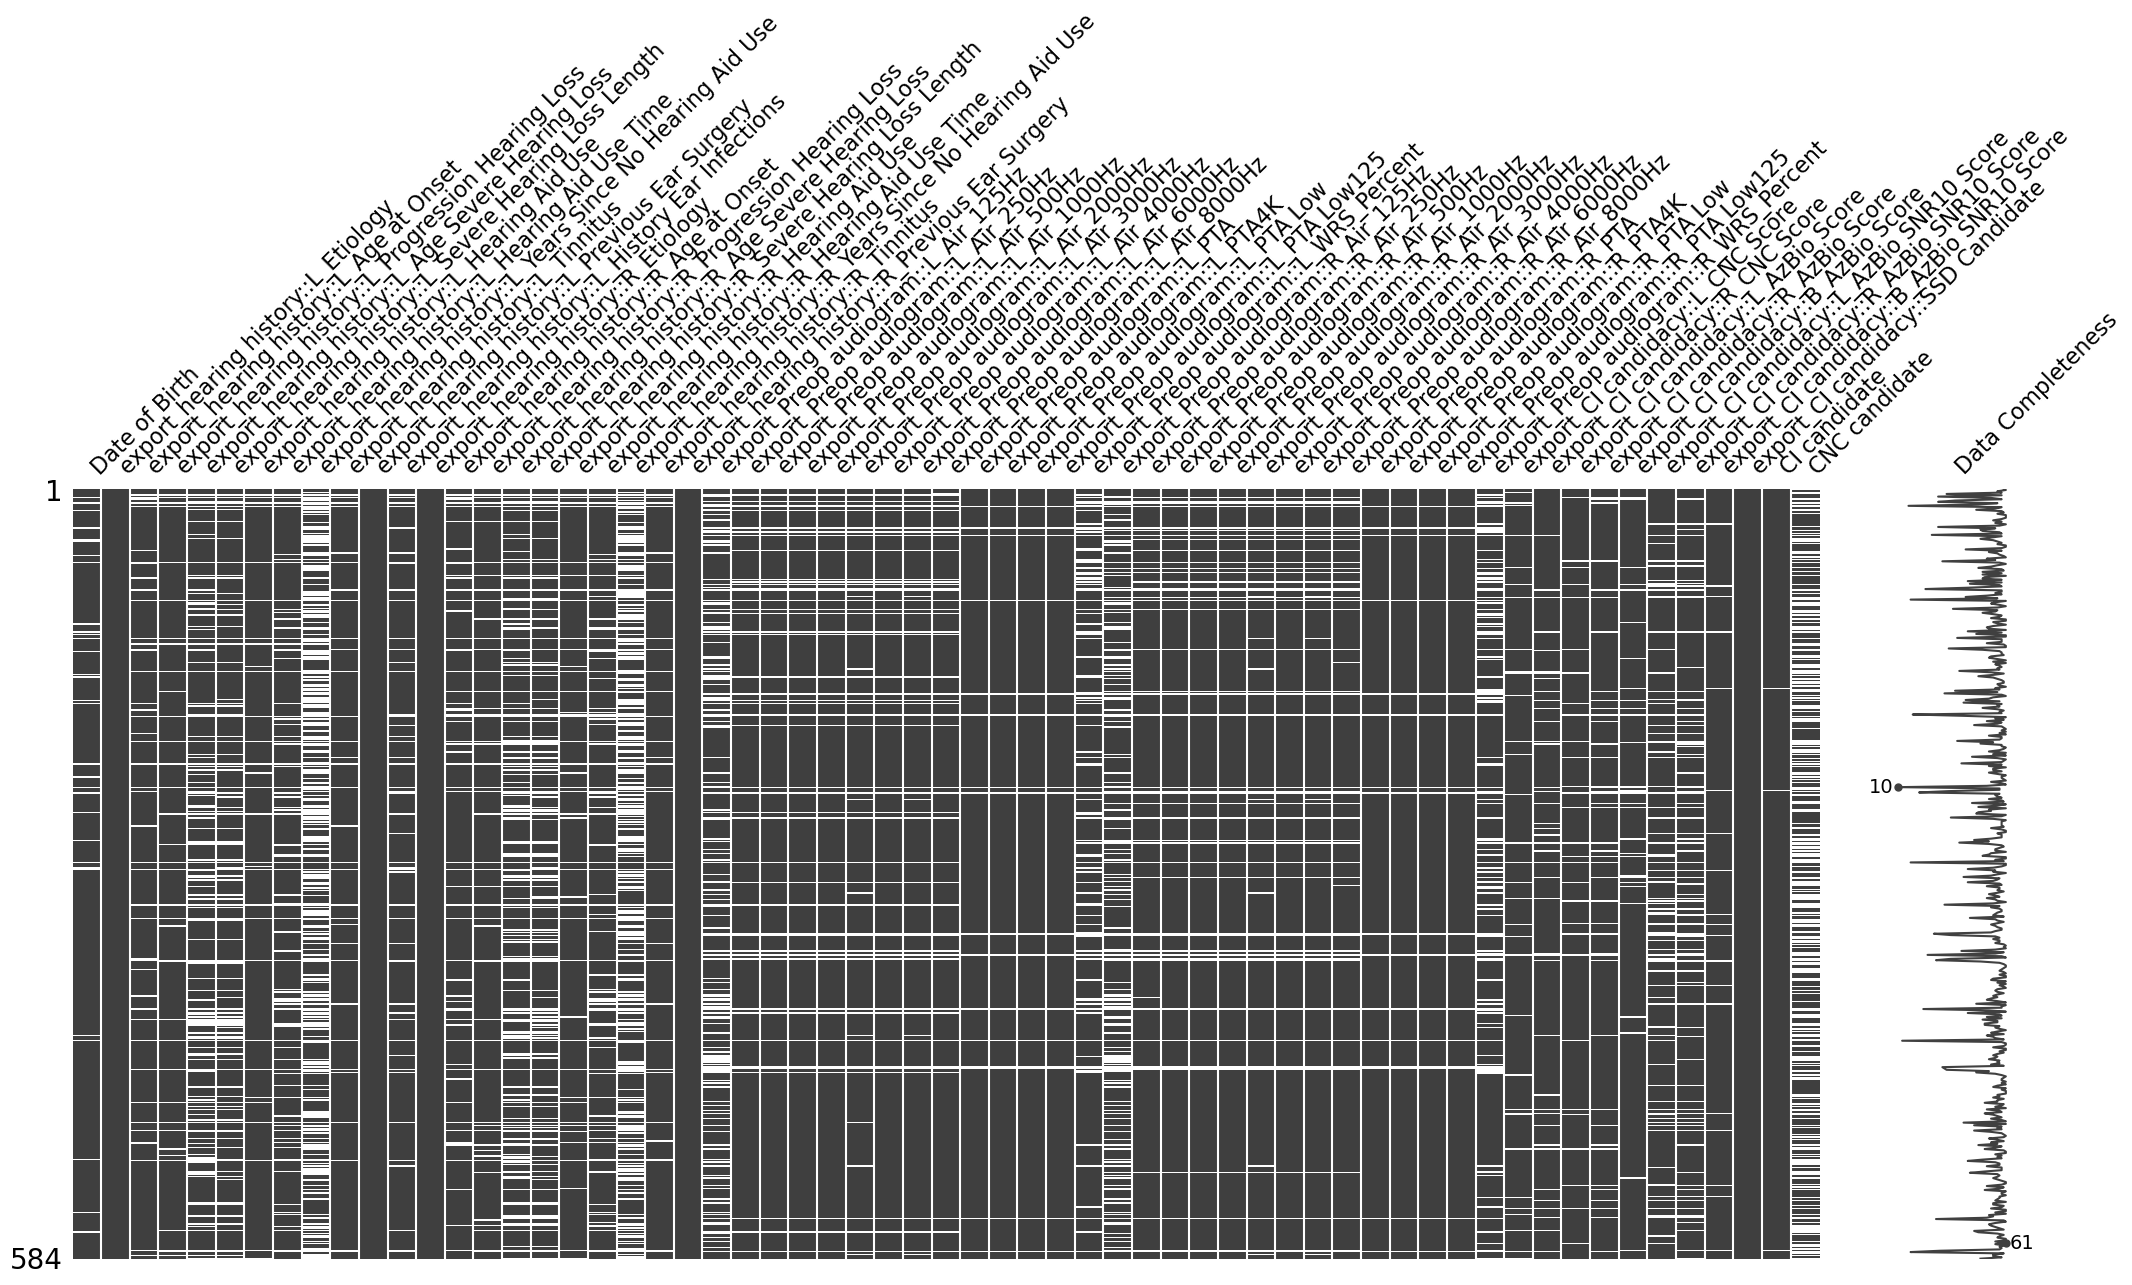

In [46]:
msno.matrix(CI_df_final, labels=True)
plt.show()


In [44]:
def drop_miss(df):
    l=['CI candidate','CNC candidate']
    df=df.dropna(subset=l, how='all')
    return df